<a href="https://colab.research.google.com/github/sundar911/marketing_analytics/blob/main/marketing_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imports and setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn
from sklearn import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [ ]:
df.to_csv('/content/drive/MyDrive/marketing_data_modified.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/marketing_data_modified.csv', low_memory=False, parse_dates=True)
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [ ]:
df_sp_analyse = pd.read_csv('/content/drive/MyDrive/marketing_data_all_numeric.csv')

In [ ]:
df_sp_analyse.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,CA,GER,IND,ME,SA,SP,US,campaign_binary
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,1,1190,51,15,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2,577,60,18,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,0,251,63,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,0,11,54,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2,91,32,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,1,1190,51,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2,577,60,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,0,251,63,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,0,11,54,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2,91,32,8


In [ ]:
df.loc[df.Marital_Status=='Absurd']

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases
1068,1068,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0,CA,0,0,1169,64,17
1339,1339,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,1,0,AUS,0,3,1216,28,22


In [ ]:
df.loc[1339, 'Marital_Status'] = 'Single'

In [ ]:
df.loc[1068, 'Marital_Status'] = 'Single'

In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,0.950446,0.446875,605.798214,52.096875,14.862054
std,646.776623,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,0.751803,0.890543,602.249288,11.694144,7.677173
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,25.000000,0.000000
25%,559.750000,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,44.000000,8.000000
50%,1119.500000,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,396.000000,51.000000,15.000000
75%,1679.250000,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1045.500000,62.000000,21.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,2525.000000,81.000000,44.000000


# Handling outliers and missing data


In [ ]:
|df.isna().sum().sort_values(ascending=False)

 Income                24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

## Income

In [ ]:
df[' Income ']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [ ]:
df[' Income '] = df[' Income '].str.replace('$', '').str.replace(',', '').astype(float)

/Users/sundarraghavanl/opt/anaconda2/envs/main_shiz/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df[' Income '].dtype

dtype('float64')

## Analysing inherent skew and exploring transformations

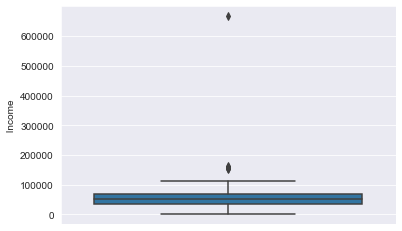

In [ ]:
sns.boxplot(y=df[' Income ']);

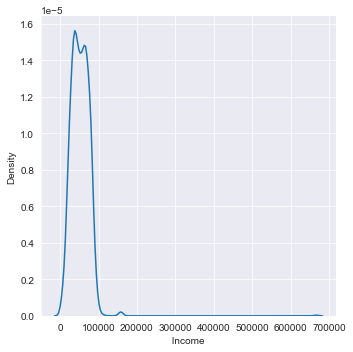

In [ ]:
sns.displot(df[' Income '], kind='kde');

In [ ]:
df[' Income '].skew()

6.763487372811116

In [ ]:
np.log(df[' Income ']).skew()

-1.1680987871418043

In [ ]:
np.sqrt(df[' Income ']).skew()

0.39400387842725937

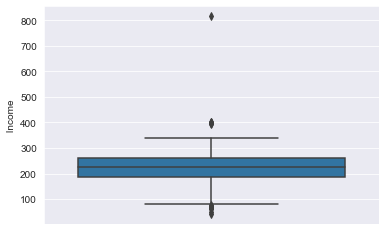

In [ ]:
sns.boxplot(y=np.sqrt(df[' Income ']))

In [ ]:
np.cbrt(df[' Income ']).skew()

-0.24085523757820537

In [ ]:
df[' Income '].fillna(df[' Income '].median(), inplace=True)

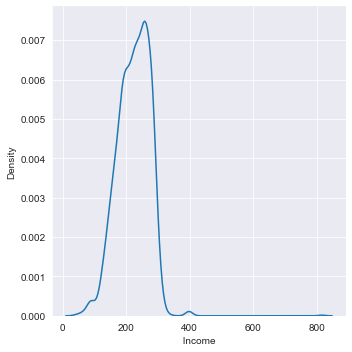

In [ ]:
sns.displot(np.sqrt(df[' Income ']), kind='kde');

In [ ]:
iqr = df[' Income '].quantile(0.75) - df[' Income '].quantile(0.25)
df[' Income '] = np.where(df[' Income '] > df[' Income '].quantile(0.75) + 1.5*iqr, df[' Income '].quantile(0.75) + 1.5*iqr, df[' Income '])

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [ ]:
df.Age.describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

## Age

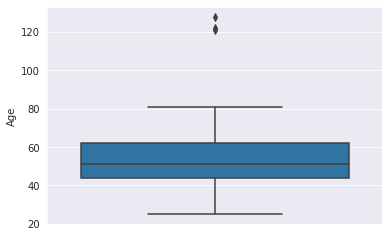

In [ ]:
sns.boxplot(y=df.Age)

In [ ]:
df[df.Age>100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,1,0,22,128,4
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,0,1,1853,122,15
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,1,0,65,121,6


In [ ]:
df.columns.get_loc('Age')

31

In [ ]:
df.iloc[513, 31] = df.Age.median()
df.iloc[827, 31] = df.Age.median()
df.iloc[2233, 31] = df.Age.median()

In [ ]:
df.Age.describe()

count    2240.000000
mean       52.096875
std        11.694144
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: Age, dtype: float64

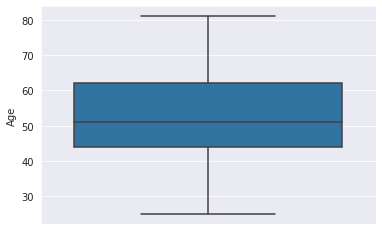

In [ ]:
sns.boxplot(y=df.Age)

In [ ]:
df.to_csv('/content/drive/MyDrive/marketing_data_modified.csv', index=False)

# Feature Engineering 

In [ ]:
df['Childrenhome'] = df.Kidhome+df.Teenhome

In [ ]:
df['Childrenhome']

0       0
1       0
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    2
Name: Childrenhome, Length: 2240, dtype: int64

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Childrenhome
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,US,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,SP,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,1
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,IND,0


In [ ]:
df['Total_Accepted_Cmps'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response

In [ ]:
df['Total_Mnt_spent'] = df.MntFishProducts + df.MntFruits + df.MntGoldProds + df.MntMeatProducts + df.MntSweetProducts + df.MntWines

In [ ]:
df['TotalPurchases'] = df.NumCatalogPurchases + df.NumDealsPurchases + df.NumStorePurchases + df.NumWebPurchases

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.Education

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [ ]:
df['Age'] = 2021 - df.Year_Birth

In [ ]:
df_1 = df[['Age', 'Childrenhome', ' Income ', 'Total_Mnt_spent', 'TotalPurchases', 'NumWebVisitsMonth', 'Total_Accepted_Cmps', 'Complain']]

In [ ]:
df_1

,Age,Childrenhome,Income,Total_Mnt_spent,TotalPurchases,NumWebVisitsMonth,Total_Accepted_Cmps,Complain
0,51,0,84835.0,1190,15,1,0,0
1,60,0,57091.0,577,18,5,1,0
2,63,1,67267.0,251,11,2,0,0
3,54,2,32474.0,11,4,7,0,0
4,32,1,21474.0,91,8,7,1,0
...,...,...,...,...,...,...,...,...
2235,45,1,66476.0,689,20,4,0,0
2236,44,1,31056.0,55,5,8,0,0
2237,45,1,46310.0,309,14,8,0,0
2238,43,0,65819.0,1383,20,3,0,0


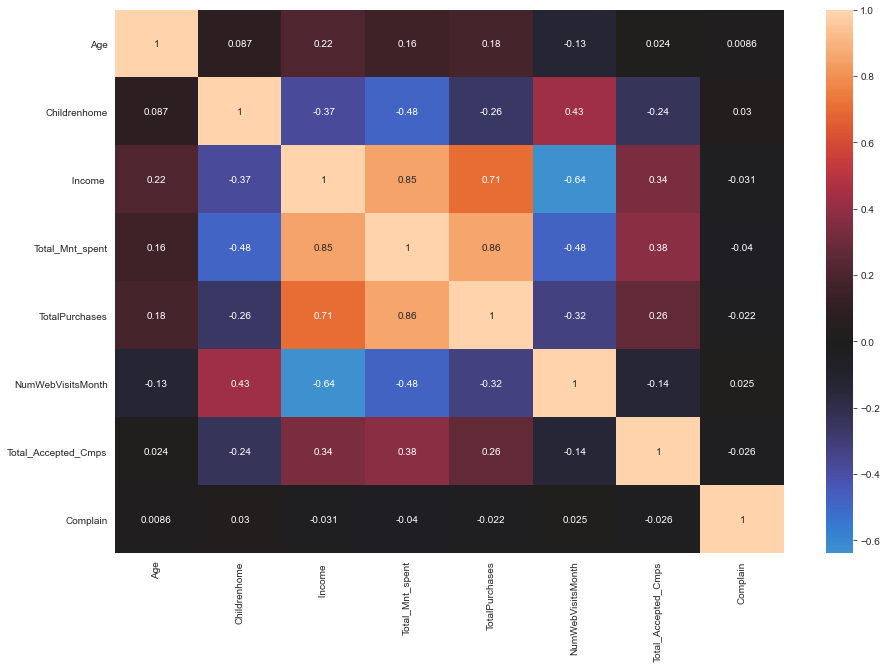

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_1.corr('spearman'), center=0, annot=True);

complain is binary which is prolly why spearman's is failing or coz there are only 21 complaints 

In [ ]:
np.corrcoef(df.NumWebVisitsMonth, df.NumWebPurchases)

array([[ 1.        , -0.05584633],
       [-0.05584633,  1.        ]])

no. of website visits are -vely correlated with total purchases, income and total amount spent 

In [ ]:
df.NumWebVisitsMonth * 12

0       12
1       60
2       24
3       84
4       84
        ..
2235    48
2236    96
2237    96
2238    36
2239    84
Name: NumWebVisitsMonth, Length: 2240, dtype: int64

In [ ]:
df.NumWebPurchases

0       4
1       7
2       3
3       1
4       3
       ..
2235    5
2236    1
2237    6
2238    5
2239    8
Name: NumWebPurchases, Length: 2240, dtype: int64

In [ ]:
df_income_marketing = df[[' Income ', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebPurchases']]

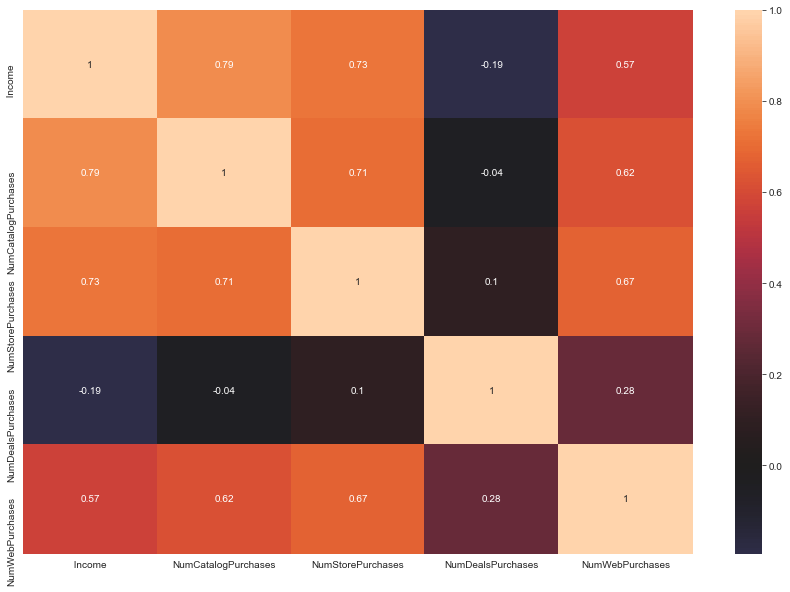

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_income_marketing.corr('spearman'), center=0, annot=True);

Focus more or catalog and store based marketing for high income folks

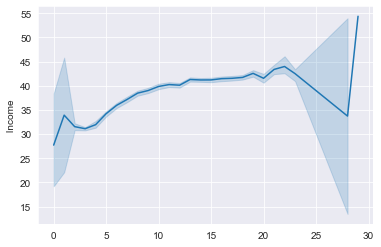

In [ ]:
sns.lineplot(y=np.cbrt(df[' Income ']), x=df.NumCatalogPurchases+df.NumStorePurchases);

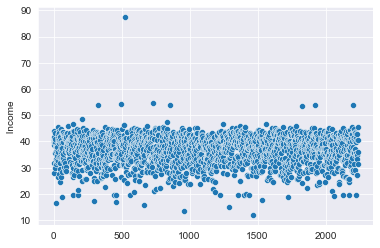

In [ ]:
sns.scatterplot(x=df.index, y=np.cbrt(df[' Income ']))

/Users/sundarraghavanl/opt/anaconda2/envs/main_shiz/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


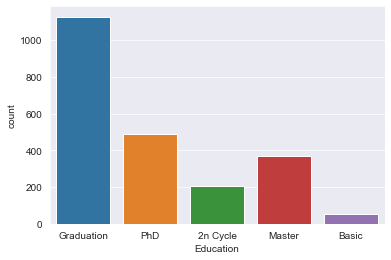

In [ ]:
sns.countplot(df.Education);

/Users/sundarraghavanl/opt/anaconda2/envs/main_shiz/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


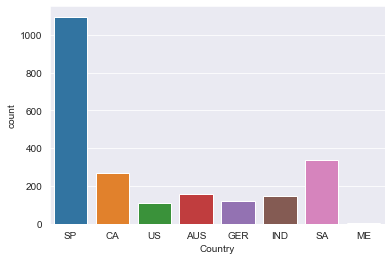

In [ ]:
sns.countplot(df.Country);

/Users/sundarraghavanl/opt/anaconda2/envs/main_shiz/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


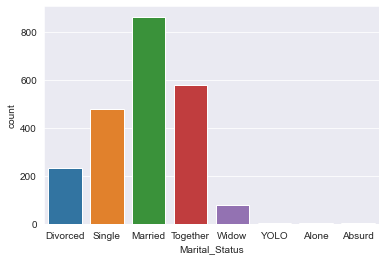

In [ ]:
sns.countplot(df.Marital_Status);

In [ ]:
df[df.Marital_Status=='Alone']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases
286,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,0,0,0,0,CA,1,0,89,33,11
838,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,0,0,1,0,CA,2,1,49,48,6
959,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,0,0,0,0,CA,2,0,632,63,23


In [ ]:
marital_map = {'Alone': 'Single',
               'YOLO': 'Single'}

In [ ]:
df.Marital_Status.replace(marital_map, inplace=True)

/Users/sundarraghavanl/opt/anaconda2/envs/main_shiz/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


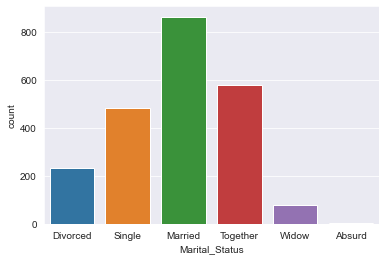

In [ ]:
sns.countplot(df.Marital_Status);

In [ ]:
df.to_csv('/content/drive/MyDrive/marketing_data_modified.csv')

#Statistical Analysis

## Store purchases 

In [ ]:
sp_corr = []
cols = []
df_sp = pd.DataFrame(columns=['column', 'corr'])

for col in df.columns:
    if(df[col].dtype=='int64' or df[col].dtype=='float64'):
        corr = scipy.stats.spearmanr(df.NumStorePurchases, df[col])[0]
        sp_corr.append(corr)
        cols.append(col)

df_sp.column = cols
df_sp['corr'] = sp_corr

In [ ]:
df_sp.sort_values(by='corr', ascending=False)

,column,corr
16,NumStorePurchases,1.000000
29,TotalPurchases,0.867559
7,MntWines,0.806918
27,Total_Mnt_spent,0.804777
9,MntMeatProducts,0.779336
3,Income,0.728819
15,NumCatalogPurchases,0.708612
14,NumWebPurchases,0.672625
8,MntFruits,0.583358
10,MntFishProducts,0.582713


people don't come to shops as much if they have kids or are frequent visitors of the website

In [ ]:
df_sp_analyse = df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [ ]:
df_sp_analyse.shape

(2240, 31)

In [ ]:
df_sp_analyse = pd.get_dummies(df_sp_analyse,columns=['Education', 'Marital_Status', 'Country'], prefix='', prefix_sep='',drop_first=True)

In [ ]:
df_sp_analyse.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,CA,GER,IND,ME,SA,SP,US
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,1,1190,51,15,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2,577,60,18,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,0,251,63,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,0,11,54,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2,91,32,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_sp_analyse.shape

(2240, 43)

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
x = df_sp_analyse.drop(columns='NumStorePurchases')
y = df_sp_analyse['NumStorePurchases']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_sp_analyse.drop('NumStorePurchases', axis=1), df_sp_analyse.NumStorePurchases, test_size=0.2, random_state=100)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = model.predict(x_test)

In [ ]:
print('R^2: ',  sklearn.metrics.r2_score(y_test, preds))

R^2:  1.0


In [ ]:
 print('Mean absolute error (regression loss): ',  sklearn.metrics.mean_absolute_error(y_test, preds))

Mean absolute error (regression loss):  9.715377680085722e-13


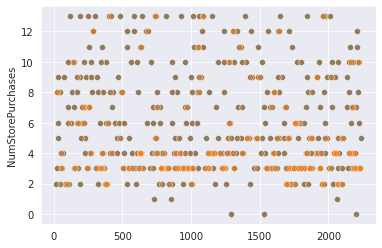

In [ ]:
sns.scatterplot(y=y_test, x=y_test.index)
sns.scatterplot(y=preds, x=y_test.index, alpha=0.5)

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=420).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist(), top=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
11.1237 ± 1.2515,TotalPurchases
1.5383 ± 0.0821,NumCatalogPurchases
1.4045 ± 0.1264,NumWebPurchases
0.6850 ± 0.0860,NumDealsPurchases
0 ± 0.0000,US
0 ± 0.0000,AcceptedCmp1
0 ± 0.0000,AcceptedCmp5
0 ± 0.0000,AcceptedCmp4
0 ± 0.0000,AcceptedCmp3
0 ± 0.0000,NumWebVisitsMonth


In [ ]:
!pip install shap

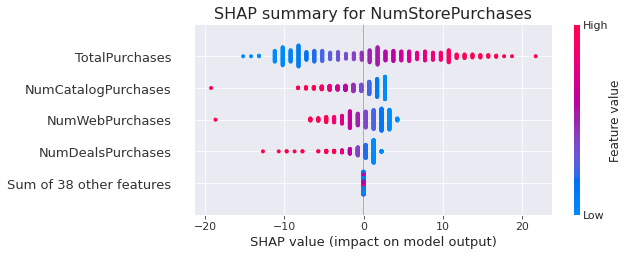

In [ ]:
import shap

# calculate shap values 
ex = shap.Explainer(model, x_train)
shap_values = ex(x_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);


*   More the total purchases, more the store purchases
*   Lesser the catalog, web and deals purchases, more are the store purchases 

## Country vs Products bought

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


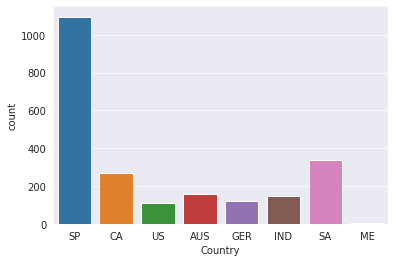

In [ ]:
sns.countplot(df.Country)

In [ ]:
df.groupby(by='Country').agg({'TotalPurchases':'mean'}).sort_values(by='TotalPurchases', ascending=False)

,TotalPurchases
Country,
ME,19.666667
US,16.155963
CA,15.302239
SA,15.183976
GER,14.900000
SP,14.659361
AUS,14.462500
IND,14.182432


Mexico fares significantly better than the rest of the world when the focus is on average of the number of total purchases made, even though customers are less

In [ ]:
df[df.Country=='ME']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases
149,9323,1949,Master,Together,49912.0,0,1,2012-09-07,5,520,8,223,32,49,42,4,10,5,7,8,1,0,0,0,0,1,0,ME,1,1,874,72,26
293,5080,1993,Graduation,Single,70515.0,0,0,2013-10-21,12,420,0,452,182,64,140,1,6,6,4,2,0,0,0,0,0,1,0,ME,0,0,1258,28,17
1436,2920,1975,PhD,Single,52614.0,0,1,2012-12-01,63,789,0,142,12,9,38,2,2,4,8,8,0,0,0,0,0,0,0,ME,1,0,990,46,16


In [ ]:
df.groupby(by='Country').agg({'TotalPurchases':'sum'}).sort_values(by='TotalPurchases', ascending=False)

,TotalPurchases
Country,
SP,16052
SA,5117
CA,4101
AUS,2314
IND,2099
GER,1788
US,1761
ME,59


Spain, which is the largest market by far, has lesser average number of total purchases than much smaller markets like US and ME (does this indicate possibility of expansions?)

In [ ]:
df.groupby(by='Country').agg({'Total_Mnt_spent':'mean'}).sort_values(by='Total_Mnt_spent', ascending=False)

,Total_Mnt_spent
Country,
ME,1040.666667
CA,628.850746
SA,626.323442
GER,624.275000
US,622.770642
SP,604.767123
AUS,561.018750
IND,537.060811


people from Mexico spend the most (again 3 data points only so don't know how valid this is) and it can be seen that in the largest market (Spain), the average total amount people spend is about 4% lesser than the smaller markets

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df.Country.unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [ ]:
country_df = df.groupby('Country').agg({'MntWines':'mean',
                                        'MntFruits':'mean',
                                        'MntMeatProducts':'mean',
                                        'MntSweetProducts':'mean',
                                        'MntFishProducts':'mean',
                                        'MntGoldProds':'mean'}).loc[['GER', 'IND', 'SP', 'US', 'CA', 'SA', 'AUS']] 

In [ ]:
country_df

,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntFishProducts,MntGoldProds
Country,,,,,,
GER,312.358333,25.516667,173.950000,23.916667,39.725000,48.808333
IND,245.054054,25.608108,171.189189,21.790541,32.635135,40.783784
SP,308.667580,25.978082,163.508676,27.592694,36.771689,42.248402
US,297.302752,27.926606,185.834862,26.467890,40.706422,44.532110
CA,315.854478,28.902985,172.194030,28.649254,37.417910,45.832090
SA,314.296736,26.519288,173.287834,26.762611,40.563798,44.893175
AUS,277.325000,24.275000,144.356250,28.800000,36.462500,49.800000


In [ ]:
pairwise_top = pd.DataFrame(
    squareform(pdist(country_df, metric='cosine')),
    columns = country_df.index,
    index = country_df.index
)

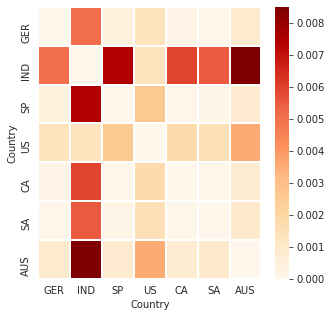

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(
    pairwise_top,
    cmap='OrRd',
    linewidth=1
)

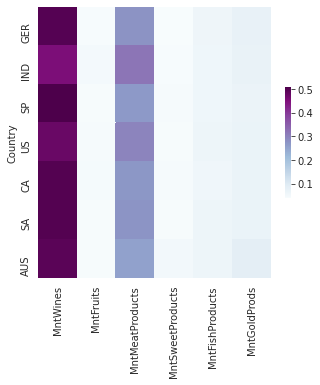

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(
    country_df.apply(lambda x : x / x.sum(), axis=1),
    cmap='BuPu',
    square=True,
    cbar_kws = {'fraction' : 0.02}
)

### MANOVA

In [ ]:
from statsmodels.multivariate.manova import MANOVA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_scaled = pd.DataFrame(columns=['Country', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntFishProducts','MntGoldProds'])

In [ ]:
for i in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntFishProducts','MntGoldProds']:
  final = []

  for j in ['GER', 'IND', 'SP', 'US', 'CA', 'SA', 'AUS']:
    scaled = scaler.fit_transform( np.asarray (df[df.Country==j][i]).reshape(-1,1) )

    for k in scaled:
      final.append(k[0])
    
  df_scaled[i] = final

normalising each of the product sales by country so that we can perform MANOVA

In [ ]:
df_scaled.Country = df.Country

In [ ]:
df_scaled

,Country,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntFishProducts,MntGoldProds
0,SP,1.345768,1.473797,0.354690,0.286643,-0.443353,0.299911
1,CA,-0.802667,-0.636136,-0.685977,-0.566179,-0.712323,-0.478037
2,US,-0.454909,0.256528,0.022949,-0.679889,-0.712323,1.411266
3,AUS,-0.882238,-0.609085,-0.754143,-0.566179,-0.586803,-0.607695
4,SP,0.541210,0.283579,1.299926,1.025756,2.676702,-0.681785
...,...,...,...,...,...,...,...
2232,SP,-0.735997,-0.512583,-0.514959,-0.407875,-0.572145,-0.704790
2233,IND,1.305185,2.013766,3.509320,0.807072,-0.290416,-0.820059
2234,US,1.395048,-0.645548,-0.530992,-0.624830,-0.684837,2.325147
2235,US,-0.716740,-0.645548,-0.734077,-0.624830,-0.684837,-0.754191


In [ ]:
for i in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntFishProducts','MntGoldProds']:
  sp = df_scaled.query('Country == "SP"')[i]
  us = df_scaled.query('Country == "CA"')[i]
  ca = df_scaled.query('Country == "US"')[i]
  aus = df_scaled.query('Country == "AUS"')[i]
  ger = df_scaled.query('Country == "GER"')[i]
  ind = df_scaled.query('Country == "IND"')[i]
  sa = df_scaled.query('Country == "SA"')[i]

  # Bartlett's test in Python with SciPy:
  stat, p = stats.levene(sp, us, ca, aus, ger, ind, sa)

  # Get the results:
  print(stat, p)

1.4897037276903882 0.17764852025666314
0.8360477613435419 0.5418723584720928
0.6375972750239199 0.7002456771527261
0.358109435745084 0.9054434441435419
1.7461521018000077 0.1065065220041259
1.1365092826486902 0.3383195972942552


Levene's indicates that the variance among each product sales across countries is not significantly different which is basically a statistical nod 
for going ahead with the MANOVA

In [ ]:
maov = MANOVA.from_formula( 'MntWines + MntFruits + MntMeatProducts + MntSweetProducts + MntFishProducts + MntGoldProds ~ Country', data=df_scaled )
res = maov.mv_test()
print(res.summary())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
         Intercept        Value  Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.9996 6.0000 2222.0000  0.1401 0.9909
           Pillai's trace 0.0004 6.0000 2222.0000  0.1401 0.9909
   Hotelling-Lawley trace 0.0004 6.0000 2222.0000  0.1401 0.9909
      Roy's greatest root 0.0004 6.0000 2222.0000  0.1401 0.9909
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Country         Value   Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9850 36.0000  9760.2463  0.9375 0.5761
         Pillai's trace 0.0151 36.0000 13362.

The differences in the distributions of the amount spent on different products in different countries are not statistically significant

the confidence levels of each stat returned by the MANOVA suggest that there is no significant contribution of the independent variable (country) to the changes in the dependent variables (MntWine, MntFruits, ...).


*   Wilk's lambda suggests that 98.5% of the changes in the dependent variables can't be explained by the changes in the independent variable and the p-value is also huge
*   Pillai's trace is a number b/w 0 and 1 and the closer it is to 1, the more it suggests that the dependent variables are influenced by the independent variable. but here it's just 0.0151



## Gold purchases

In [ ]:
scipy.stats.pearsonr(df.NumStorePurchases, df.MntGoldProds)

(0.3816780138174973, 1.3447256974369095e-78)

In [ ]:
scipy.stats.spearmanr(df.NumStorePurchases, df.MntGoldProds)

SpearmanrResult(correlation=0.5398635641035611, pvalue=1.1401704011707027e-169)

In [ ]:
scipy.stats.kendalltau(df.NumStorePurchases, df.MntGoldProds)

KendalltauResult(correlation=0.3922909281630615, pvalue=4.752746314649227e-152)

Though a bit weak, there is a positive correlation b/w the two varaibles 

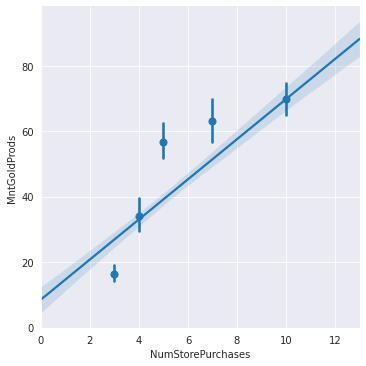

In [ ]:
sns.lmplot(y='MntGoldProds', x='NumStorePurchases', data=df, x_estimator=np.mean, x_bins=5, x_ci=95)

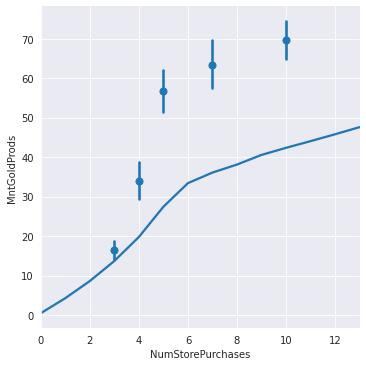

In [ ]:
sns.lmplot(y='MntGoldProds', x='NumStorePurchases', data=df, lowess=True, x_bins=5)

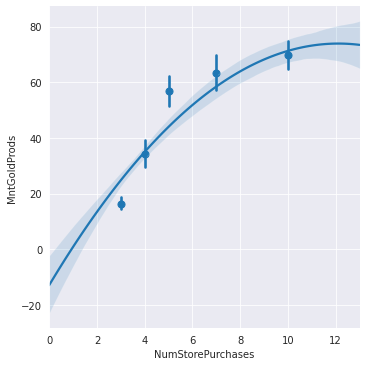

In [ ]:
sns.lmplot(y='MntGoldProds', x='NumStorePurchases', data=df, order=2, x_bins=5)

## Fish prodcuts

In [ ]:
df_phd = df[df.Education=='PhD']
df_phd_married = df_phd[df_phd.Marital_Status=='Married']

In [ ]:
df_phd_married.MntFishProducts.mean()

27.015625

In [ ]:
df.MntFishProducts.mean()

37.52544642857143

In [ ]:
df_sp_analyse['Married_and_PhD'] = df_sp_analyse.Married + df_sp_analyse.PhD

In [ ]:
scipy.stats.kendalltau(df_sp_analyse.MntFishProducts, df_sp_analyse.Married_and_PhD)

KendalltauResult(correlation=-0.08113671214155235, pvalue=2.0086179493084173e-06)

In [ ]:
cols=[]
corrs=[]
p_vals = []
for col in df_sp_analyse.columns:
  cols.append(col)
  corrs.append(scipy.stats.spearmanr(df_sp_analyse.MntFishProducts, df_sp_analyse[col])[0])
  p_vals.append(scipy.stats.spearmanr(df_sp_analyse.MntFishProducts, df_sp_analyse[col])[1])


In [ ]:
df_fish = pd.DataFrame(columns=['Feature', 'Correlation', 'p_value'])

In [ ]:
df_fish.Feature = cols
df_fish.Correlation = corrs
df_fish.p_value = p_vals
df_fish.sort_values(by='Correlation', ascending=False)

,Feature,Correlation,p_value
7,MntFishProducts,1.000000,0.000000e+00
6,MntMeatProducts,0.726242,0.000000e+00
5,MntFruits,0.705016,0.000000e+00
8,MntSweetProducts,0.700871,0.000000e+00
24,Total_Mnt_spent,0.695620,0.000000e+00
12,NumCatalogPurchases,0.657124,4.855359e-277
13,NumStorePurchases,0.582713,7.222969e-204
26,TotalPurchases,0.580066,1.318804e-201
0,Income,0.574405,7.729496e-197
9,MntGoldProds,0.565283,2.381115e-189


In [ ]:
scipy.stats.spearmanr(df.Childrenhome, df.TotalPurchases)

SpearmanrResult(correlation=-0.2574117247771805, pvalue=3.133875695615334e-35)

In [ ]:
scipy.stats.spearmanr(df.Childrenhome, df.Total_Mnt_spent)

SpearmanrResult(correlation=-0.4838324792496069, pvalue=8.591541495024613e-132)

## Countries and campaigns 

In [ ]:
df_cmps = df.groupby(by='Country', as_index=False).agg({'Total_Accepted_Cmps':'mean',
                                                        'AcceptedCmp1':'mean',
                                                        'AcceptedCmp2':'mean',
                                                        'AcceptedCmp3':'mean',
                                                        'AcceptedCmp4':'mean',
                                                        'AcceptedCmp5':'mean',
                                                        'Response':'mean'})

In [ ]:
df_cmps

,Country,Total_Accepted_Cmps,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,AUS,0.362500,0.043750,0.000000,0.056250,0.037500,0.081250,0.143750
1,CA,0.466418,0.067164,0.022388,0.067164,0.089552,0.078358,0.141791
2,GER,0.458333,0.058333,0.016667,0.083333,0.091667,0.066667,0.141667
3,IND,0.351351,0.047297,0.013514,0.087838,0.074324,0.040541,0.087838
4,ME,1.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667
5,SA,0.409496,0.059347,0.011869,0.062315,0.059347,0.062315,0.154303
6,SP,0.484932,0.071233,0.014612,0.075799,0.081279,0.081279,0.160731
7,US,0.357798,0.064220,0.000000,0.073394,0.055046,0.045872,0.119266


Australians and Americans accept comparatively less number of campaigns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/marketing_data.csv')

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
df.columns[-8:-2]

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'],
      dtype='object')

In [ ]:
observed = pd.crosstab(df.Country, df_sp_analyse.Total_Accepted_Cmps)

In [ ]:
observed.values

array([[128,  15,  10,   5,   2,   0],
       [197,  42,  14,   7,   6,   2],
       [ 86,  18,  12,   3,   1,   0],
       [113,  25,   4,   5,   1,   0],
       [  1,   1,   1,   0,   0,   0],
       [248,  58,  20,   5,   5,   1],
       [777, 191,  75,  25,  20,   7],
       [ 81,  20,   6,   1,   1,   0]])

In [ ]:
observed.shape

(8, 6)

In [ ]:
stats.chi2_contingency(observed)

(29.682411285379104,
 0.7224427696255775,
 35,
 array([[1.16500000e+02, 2.64285714e+01, 1.01428571e+01, 3.64285714e+00,
         2.57142857e+00, 7.14285714e-01],
        [1.95137500e+02, 4.42678571e+01, 1.69892857e+01, 6.10178571e+00,
         4.30714286e+00, 1.19642857e+00],
        [8.73750000e+01, 1.98214286e+01, 7.60714286e+00, 2.73214286e+00,
         1.92857143e+00, 5.35714286e-01],
        [1.07762500e+02, 2.44464286e+01, 9.38214286e+00, 3.36964286e+00,
         2.37857143e+00, 6.60714286e-01],
        [2.18437500e+00, 4.95535714e-01, 1.90178571e-01, 6.83035714e-02,
         4.82142857e-02, 1.33928571e-02],
        [2.45378125e+02, 5.56651786e+01, 2.13633929e+01, 7.67276786e+00,
         5.41607143e+00, 1.50446429e+00],
        [7.97296875e+02, 1.80870536e+02, 6.94151786e+01, 2.49308036e+01,
         1.75982143e+01, 4.88839286e+00],
        [7.93656250e+01, 1.80044643e+01, 6.90982143e+00, 2.48169643e+00,
         1.75178571e+00, 4.86607143e-01]]))

lots of expected values lingering around and below 5 => chi square test isn't appropriate. 

In [ ]:
country_map = {'SP':'Developed',
               'CA':'Developed',
               'AUS':'Developed',
               'US':'Developed',
               'GER':'Developed',
               'ME':'Developing',
               'IND':'Developing',
               'SA':'Developing',}

In [ ]:
df['Country_Binned'] = df.Country.replace(country_map)

In [ ]:
camp_binary = []
for i in df_sp_analyse.Total_Accepted_Cmps:
  if(i==0):
    camp_binary.append(0)
  else:
    camp_binary.append(1)
    
df_sp_analyse['campaign_binary'] = camp_binary

In [ ]:
observed = pd.crosstab(df.Country_Binned, df_sp_analyse.campaign_binary)

In [ ]:
observed

campaign_binary,0,1
Country_Binned,,
Developed,1269,483
Developing,362,126


Now we can apply the chi-squared test

### chi-squared test

In [ ]:
expected = stats.chi2_contingency(observed)[3]

In [ ]:
expected

array([[1275.675,  476.325],
       [ 355.325,  132.675]])

In [ ]:
chi_square = sum( [ (o-e)**2/e for o,e in zip(observed.values, expected) ] )
chi_sq_stat = chi_square[0] + chi_square[1]

In [ ]:
chi_sq_stat

0.5896868152899215

In [ ]:
critical_val = stats.chi2.ppf(q=0.95, df=1)
p_val = 1 - stats.chi2.cdf(chi_sq_stat, 1)

In [ ]:
critical_val

3.841458820694124

In [ ]:
p_val

0.442540250857568

chi_sq_stat < critical_val and p_val > 0.05 => there's no statistically significant relation b/w country and campaigns accepted

The usual rule of thumb is that Fisher's exact test is only necessary when one or more expected values are less than 5, but this is a remnant of the days when doing the calculations for Fisher's exact test was really hard. I recommend using Fisher's exact test for any experiment with a total sample size less than 1000. 

our sample size is way over 1000, so no point using the Fisher's exact test

## most successful campaign

In [ ]:
camp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
success_rates = []
for col in camp_cols:
   success_rates.append(df_sp_analyse[col].mean()*100)

In [ ]:
df_camps_success = pd.DataFrame(columns=['success_rate'], index=camp_cols)

In [ ]:
df_camps_success.success_rate = success_rates

In [ ]:
df_camps_success

,success_rate
AcceptedCmp1,6.428571
AcceptedCmp2,1.339286
AcceptedCmp3,7.276786
AcceptedCmp4,7.455357
AcceptedCmp5,7.276786
Response,14.910714


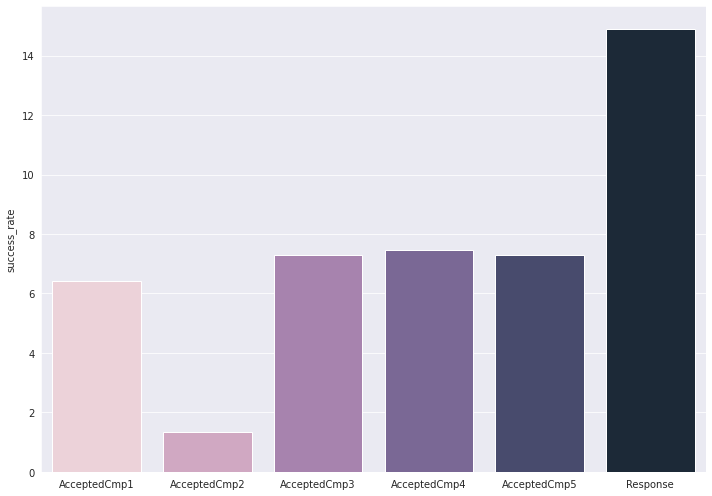

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df_camps_success.index, y=df_camps_success.success_rate, palette='ch:s=-.5,r=.5')
plt.tight_layout()

In [ ]:
sales_cols = ['MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'MntFruits', 'MntGoldProds', 'MntWines']
sales = []
for col in sales_cols:
   sales.append(df[col].mean())

In [ ]:
df_sales = pd.DataFrame(columns=['sales'], index=sales_cols)
df_sales.sales = sales

In [ ]:
df_sales.sort_values('sales', ascending=False)

,sales
MntWines,303.935714
MntMeatProducts,166.950000
MntGoldProds,44.021875
MntFishProducts,37.525446
MntSweetProducts,27.062946
MntFruits,26.302232


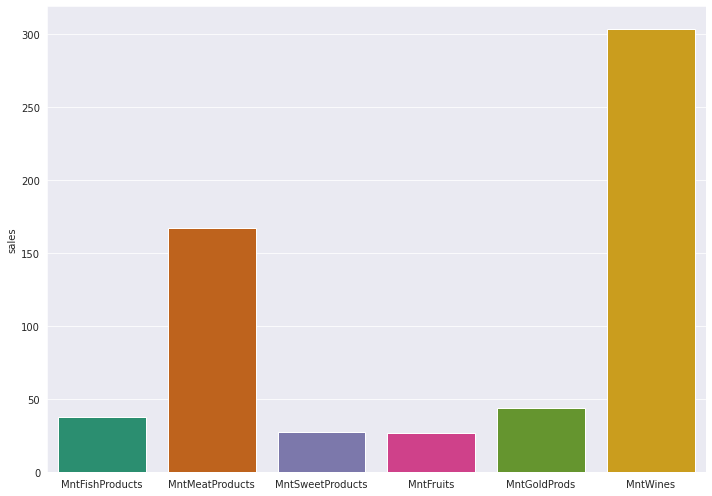

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df_sales.index, y=df_sales.sales, palette='Dark2')
plt.tight_layout()

# Campaign acceptance prediction using response as target

In [ ]:
df_sp_analyse.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Childrenhome,Total_Accepted_Cmps,Total_Mnt_spent,Age,TotalPurchases,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,CA,GER,IND,ME,SA,SP,US
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,1,1190,51,15,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2,577,60,18,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,0,251,63,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,0,11,54,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2,91,32,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_sp_analyse.Total_Accepted_Cmps.value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: Total_Accepted_Cmps, dtype: int64

In [ ]:
df_sp_analyse.columns

Index([' Income ', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Childrenhome',
       'Total_Accepted_Cmps', 'Total_Mnt_spent', 'Age', 'TotalPurchases',
       'Basic', 'Graduation', 'Master', 'PhD', 'Divorced', 'Married', 'Single',
       'Together', 'Widow', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP', 'US',
       'campaign_binary'],
      dtype='object')

In [ ]:
cols = list(df_sp_analyse.columns[4:14]) + ['Kidhome', 'Teenhome', 'campaign_binary', 'Response']

In [ ]:
x = df_sp_analyse.drop(columns=cols)

In [ ]:
y = df_sp_analyse.Response

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


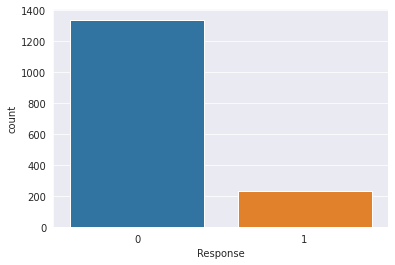

In [ ]:
sns.countplot(y_train)

### Hyperparameter tuning using grid search cross validation

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999554 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999554 (0.001339) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.890327 (0.017316) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.913095 (0.015793) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.999554 (0.001339) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.890625 (0.020450) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.909375 (0.015342) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.997768 (0.003779) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.890923 (0.020415) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.911905 (0.015202) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.954018 (0.009304) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.888839 (0.021790) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910119 (0.016852) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.911161 (0.013607) wit

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

## Implementing the best model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(max_iter=100, solver='newton-cg', C=100, penalty='l2')
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = model.predict(x_test)

In [ ]:
model.score(x_test, y_test)

0.9985119047619048

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       0.99      1.00      1.00       105

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[566   1]
 [  0 105]]


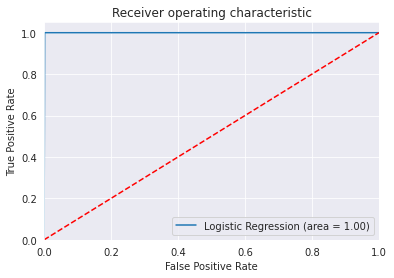

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")